In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
from subprocess import check_output


In [6]:
data = pd.read_csv('../input/processed_data.csv')


In [7]:
df = data[['p', 'p.1', 'p.2', 'p.3']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [8]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,p,p.1,p.2,p.3,train
345742,0.032332,0.036374,0.036385,0.036374,True
190834,0.284753,0.288794,0.286845,0.274637,True
8820,0.576057,0.668524,0.676819,0.670563,False
76126,0.026258,0.030300,0.026266,0.026258,True
136022,0.509317,0.521441,0.519560,0.531534,True


In [9]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,p,p.1,p.2,p.3
56282,0.557135,0.561468,0.585597,0.561468
342099,0.030300,0.030300,0.030309,0.026258
161446,0.383460,0.385469,0.373454,0.377386
120901,0.573998,0.563315,0.579903,0.578560
222336,0.341607,0.341607,0.331020,0.318799


In [10]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,p,p.1,p.2,p.3
246693,0.028291,0.028291,0.028299,0.028291
315905,0.437104,0.457288,0.433189,0.459321
23081,0.465888,0.461847,0.453581,0.453449
135672,0.433385,0.429344,0.439587,0.421261
119792,0.754975,0.744844,0.739569,0.739353


In [11]:
X = train.values[:,:4]
X[:5]

array([[0.59517519, 0.62346608, 0.59247995, 0.61251508],
       [0.39947581, 0.40755892, 0.39787409, 0.39947581],
       [0.48006523, 0.47602368, 0.48424789, 0.47602368],
       [0.5068757 , 0.49879259, 0.51106617, 0.51091725],
       [0.32342344, 0.31534033, 0.31515613, 0.33527207]])

In [12]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

TypeError: only size-1 arrays can be converted to Python scalars

In [12]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

In [13]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12770671,  0.89795461,  0.57261197],
       [ 0.7325786 , -0.65366916, -0.85010283],
       [ 0.20148544, -0.66405563,  0.46676034],
       [-0.18311228,  0.05581765,  0.87514317],
       [ 0.04339224, -0.78361323, -0.68355319]])

In [14]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

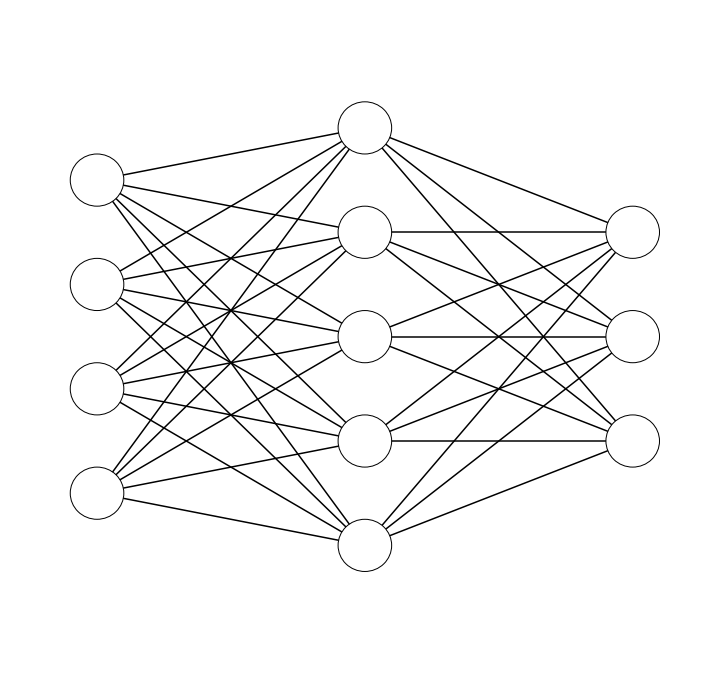

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

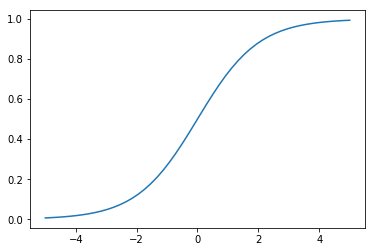

In [16]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [17]:
learning_rate = 0.2 # slowly update the network
for epoch in range(300):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

C:\Users\Yasser\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yasser\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Error: 0.08397583394290316


In [18]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

C:\Users\Yasser\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\Yasser\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [19]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['class']].replace([-1,1], ['Vessle','No_vessle'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([-1,1], ['Vessle','No_vessle'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

            class  Prediction
9          Vessle           2
12         Vessle           2
26         Vessle           2
36         Vessle           2
49         Vessle           2
57         Vessle           2
72         Vessle           2
73         Vessle           2
99         Vessle           2
118        Vessle           2
146        Vessle           2
159        Vessle           2
188        Vessle           2
219        Vessle           2
226        Vessle           2
231        Vessle           2
246        Vessle           2
249        Vessle           2
257        Vessle           2
269        Vessle           2
282        Vessle           2
301        Vessle           2
304        Vessle           2
315        Vessle           2
317        Vessle           2
320        Vessle           2
355        Vessle           2
375        Vessle           2
389        Vessle           2
409        Vessle           2
...           ...         ...
396148     Vessle           2
396149    